In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
churn_data = pd.read_csv('/Users/nadiagolub/Downloads/churn.csv') 
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)


#### ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

##### Задание 9.1

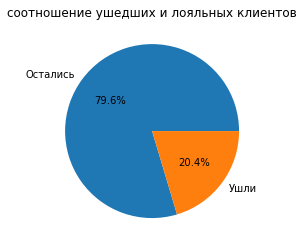

Вывод: На графике видно соотношение ушедших и лояльных клиентов


In [25]:
exited_percent = churn_data['Exited'].value_counts()
plt.pie(exited_percent, labels=['Остались', 'Ушли'], autopct='%.1f%%')
plt.title('соотношение ушедших и лояльных клиентов')
plt.show()
print('Вывод: На графике видно соотношение ушедших и лояльных клиентов')

##### Задание 9.2

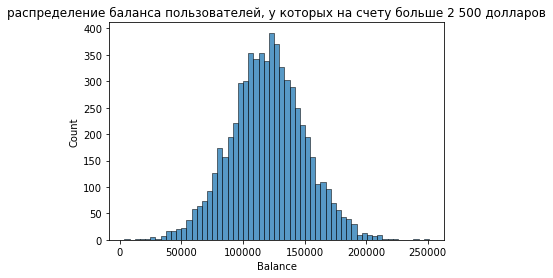

Вывод: Визуально распределение баланса пользователей, у которых на счету больше 2 500 долларов, близко к нормальному со смещенным мат. ожиданием


In [24]:
sns.histplot(data=churn_data.query('Balance > 2500'), x='Balance')
plt.title('распределение баланса пользователей, у которых на счету больше 2 500 долларов')
plt.show()
print('Вывод: Визуально распределение баланса пользователей, у которых на счету больше 2 500 долларов, близко к нормальному со смещенным мат. ожиданием')


###### Задание 9.3

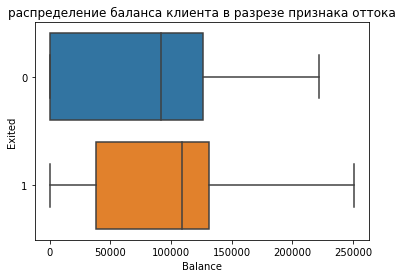

Вывод: Распределение баланса на счетах ушедших клиентов выше, также выше их медиана


In [23]:
sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
)
plt.title('распределение баланса клиента в разрезе признака оттока')
plt.show()
print('Вывод: Распределение баланса на счетах ушедших клиентов выше, также выше их медиана')

##### Задание 9.4

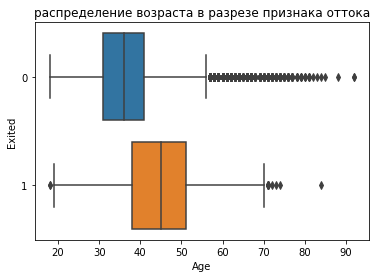

Вывод: Потенциальных выбросов больше в группе оставшихся клиентов, особое внимание нужно уделить категории возраста выше 55 лет


In [26]:
sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h'
)
plt.title('распределение возраста в разрезе признака оттока')
plt.show()
print('Вывод: Потенциальных выбросов больше в группе оставшихся клиентов, особое внимание нужно уделить категории возраста выше 55 лет')

##### Задание 9.5

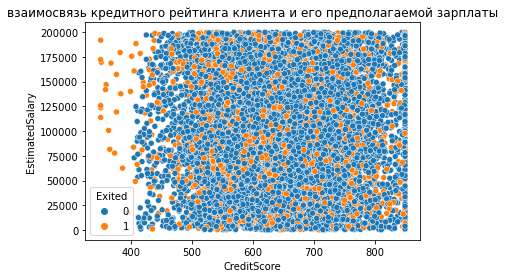

Вывод: Явной взаимосвязи нет


In [28]:
sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited'
)
plt.title('взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.show()
print('Вывод: Явной взаимосвязи нет')


##### Задание 9.6

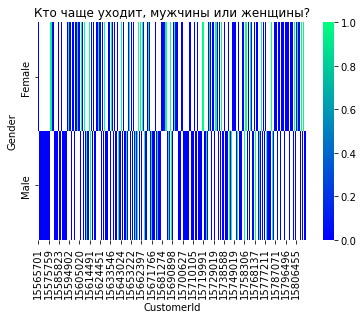

Вывод: Чаще уходят женщины


In [38]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='CustomerId',
    index='Gender',
    
)

plt.title('Кто чаще уходит, мужчины или женщины?')
sns.heatmap(data=pivot, cmap='winter')
plt.show()
print('Вывод: Чаще уходят женщины')

##### Задание 9.7

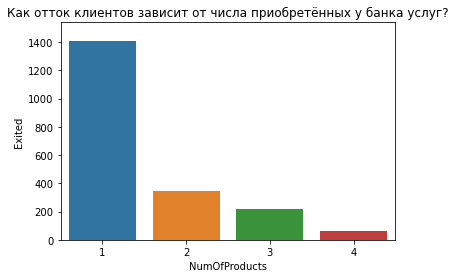

Вывод: Отток клиентов имеет обратную зависимость от числа приобретённых у банка услуг


In [40]:
sns.barplot(data=churn_data, x='NumOfProducts', y='Exited', estimator=sum, errwidth=0)
plt.title('Как отток клиентов зависит от числа приобретённых у банка услуг?')
plt.show()
print('Вывод: Отток клиентов имеет обратную зависимость от числа приобретённых у банка услуг')

##### Задание 9.8

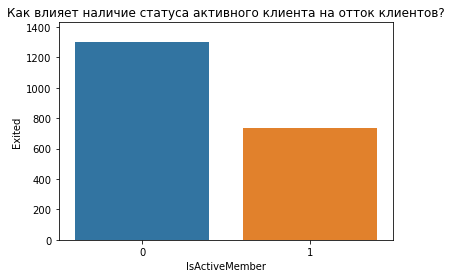

Вывод: Статус активного клиента снижает отток клиентов


In [41]:
sns.barplot(data=churn_data, x='IsActiveMember', y='Exited', estimator=sum, errwidth=0)
plt.title('Как влияет наличие статуса активного клиента на отток клиентов?')
plt.show()
print('Вывод: Статус активного клиента снижает отток клиентов')


##### Задание 9.9

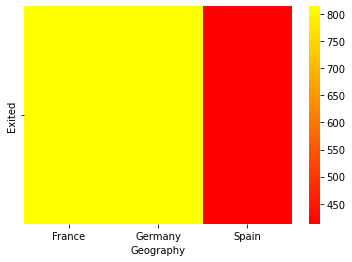

Вывод: Доля ушедших клиентов больше во Франции и Германии


In [73]:
grouped = churn_data.groupby('Geography', as_index=False)['Exited'].sum()
pivot = grouped.pivot_table(values='Exited',columns='Geography')
sns.heatmap(data=pivot, cmap='autumn')
plt.show()
print('Вывод: Доля ушедших клиентов больше во Франции и Германии')

##### Задание 9.10

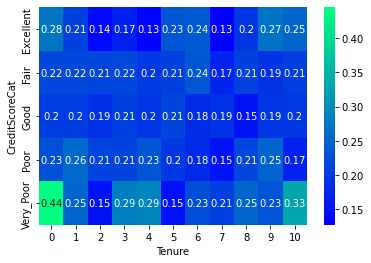

Вывод: Чаще всего уходят категории poor и very_poor почти независимо от срока пользования услугами банка, на втором месте категория Excellent


In [45]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
sns.heatmap(data=pivot, annot=True, cmap='winter')
plt.show()
print('Вывод: Чаще всего уходят категории poor и very_poor почти независимо от срока пользования услугами банка, на втором месте категория Excellent')